## Using Convolutional Neural Networks to Classify MNIST Handwritten Digits with TensorFlow

#### Import necessary libraries

In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from numpy import mean, std
import numpy as np
import pandas as pd

#### Load Dataset

In [2]:
# load train and test dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# reshape dataset to have a single color channel
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

# one hot encode target values
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

#### Prepare Pixel Data

In [4]:
# scale/normalize pixel values of grayscale images to a range of 0 to 1 by converting the data 
# type from unsigned integers to floats, then dividing the pixel values by the maximum value.

xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

#### Define the Model

source: 
1. https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow
2. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

#### Contant Hyperparameters
- **Learning rate** represents how much the parameters will adjust at each step of the learning process. 
- **Epoch** refers to the number of iterations, i.e. how many times we go through the training step
- **Batch_size** refers to how many training examples we are using at each step
- **Dropout variable**, which is used in the final hidden layer represents a threshold at which we eliminate some units at random, which helps prevent overfitting.

#### Improving the Model

- Add **Batch normalization** which stabilizes and rapidly accelerates the learning process of the model which in effect will result in performance improvement. 
- Increase in **Model Depth**, which involve changing the capacity/depth of the feature extractor part, by adding more convolutional and pooling layers with the same sized filter, while increasing the number of filters. 



In [5]:
# define cnn model

from tensorflow.keras import backend as K
K.clear_session()

model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))])
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
    
# build the computation graph by compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

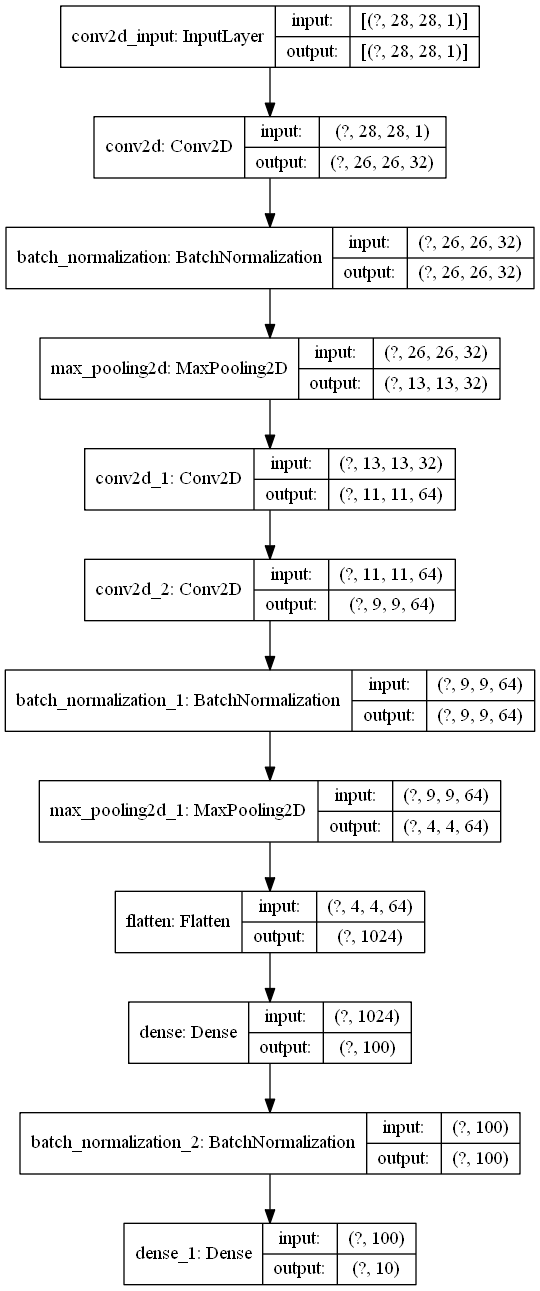

In [6]:
# print(model.summary())
plot_model(model,show_shapes=True, show_layer_names=True)

In [7]:
# fit model
callback = EarlyStopping(monitor='val_loss', patience=3)
h_new = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), verbose=0, callbacks=callback)

In [8]:
# evaluate model
train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=0)
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
print("Train loss & accuracy:", train_loss, train_acc)
print("Test loss & accuracy:", test_loss, test_acc)

Train loss & accuracy: 0.0021317938808351755 0.9995333552360535
Test loss & accuracy: 0.02364412322640419 0.9923999905586243


Text(0.5, 1.0, 'Cross Entropy Loss')

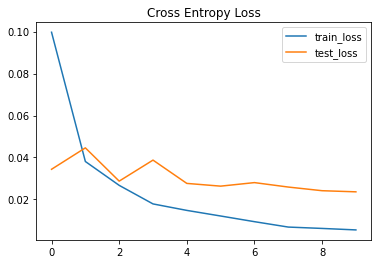

In [10]:
# plot the diagnostic learning curve
plt.plot(h_new.history['loss'])  # <-- loss for the training portion
plt.plot(h_new.history['val_loss'])  # <-- validation portion
plt.legend(['train_loss', 'test_loss'])
plt.title('Cross Entropy Loss')

Text(0.5, 1.0, 'Classification Accuracy')

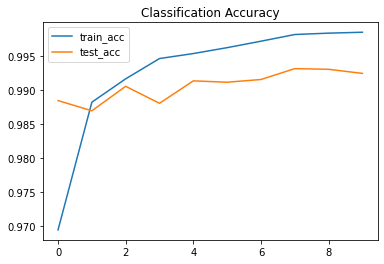

In [11]:
plt.plot(h_new.history['accuracy'])
plt.plot(h_new.history['val_accuracy'])
plt.legend(['train_acc', 'test_acc'])
plt.title('Classification Accuracy')

In [27]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample1_image.png')
    # load model
    #model = load_model('final_model.h5')
    # predict the class
    digit = cnn.predict_classes(img)
    print(digit)
 
# entry point, run the example
run_example()

[8]


In [ ]:
# We can also make predictions with the local mnist digits
image_index = 6000
plt.imshow(xtest[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(xtest[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())